In [ ]:
!makedir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

/bin/bash: line 1: makedir: command not found
cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d ehababoelnaga/multiple-disease-prediction

Dataset URL: https://www.kaggle.com/datasets/ehababoelnaga/multiple-disease-prediction
License(s): apache-2.0
100% 285k/285k [00:00<00:00, 444kB/s]
100% 285k/285k [00:00<00:00, 442kB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/multiple-disease-prediction.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Blood_samples_dataset_balanced_2(f).csv')

In [ ]:
df.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [ ]:
X = df.drop('Disease', axis=1)
y = df['Disease']

In [ ]:
X.corr()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,Triglycerides,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein
Glucose,1.000000,0.201850,0.126152,0.094962,0.032513,-0.045155,0.166459,-0.000982,-0.155353,0.053480,...,-0.144596,0.047266,0.102640,-0.139997,-0.005195,-0.052142,-0.025573,-0.221046,0.222248,0.211177
Cholesterol,0.201850,1.000000,0.207664,0.014980,0.011045,0.121565,0.090864,-0.074678,-0.299422,0.147722,...,0.168469,0.013902,0.168118,0.146531,0.057961,0.155788,-0.154108,-0.021709,-0.071308,-0.211815
Hemoglobin,0.126152,0.207664,1.000000,0.121879,0.059539,0.052803,-0.016702,-0.130591,0.188262,0.052365,...,0.154553,0.052063,0.302901,-0.011438,0.020301,-0.095531,0.002655,-0.059247,-0.096180,-0.049385
Platelets,0.094962,0.014980,0.121879,1.000000,-0.081205,0.041547,-0.186816,0.131429,-0.079204,-0.015264,...,-0.242272,0.098628,-0.205245,-0.196438,-0.097731,0.081491,-0.096443,-0.020369,-0.014930,-0.020203
White Blood Cells,0.032513,0.011045,0.059539,-0.081205,1.000000,0.068023,0.249787,-0.011324,0.014312,-0.041609,...,0.090920,0.034506,-0.030755,-0.037955,0.032459,0.152566,0.198235,0.080568,-0.122723,0.021788
Red Blood Cells,-0.045155,0.121565,0.052803,0.041547,0.068023,1.000000,-0.084555,-0.154514,-0.020241,-0.123454,...,0.067237,0.148803,0.169262,0.252507,0.178947,-0.191404,0.036679,-0.110708,-0.104942,-0.175794
Hematocrit,0.166459,0.090864,-0.016702,-0.186816,0.249787,-0.084555,1.000000,0.055150,-0.099970,-0.025486,...,-0.112917,-0.027707,-0.033376,0.036883,-0.034960,-0.107572,-0.099788,-0.019058,0.198434,-0.079240
Mean Corpuscular Volume,-0.000982,-0.074678,-0.130591,0.131429,-0.011324,-0.154514,0.055150,1.000000,0.001776,0.141168,...,-0.143843,-0.064528,-0.197323,-0.097428,0.015310,-0.002724,-0.167693,-0.000606,0.137077,-0.101596
Mean Corpuscular Hemoglobin,-0.155353,-0.299422,0.188262,-0.079204,0.014312,-0.020241,-0.099970,0.001776,1.000000,-0.021991,...,0.065253,-0.150571,0.180734,-0.014948,-0.101612,0.087612,0.043941,-0.162132,-0.213429,0.066459
Mean Corpuscular Hemoglobin Concentration,0.053480,0.147722,0.052365,-0.015264,-0.041609,-0.123454,-0.025486,0.141168,-0.021991,1.000000,...,0.159302,0.156547,0.146897,-0.093480,-0.222864,0.049895,-0.075725,0.067239,0.090829,0.043567


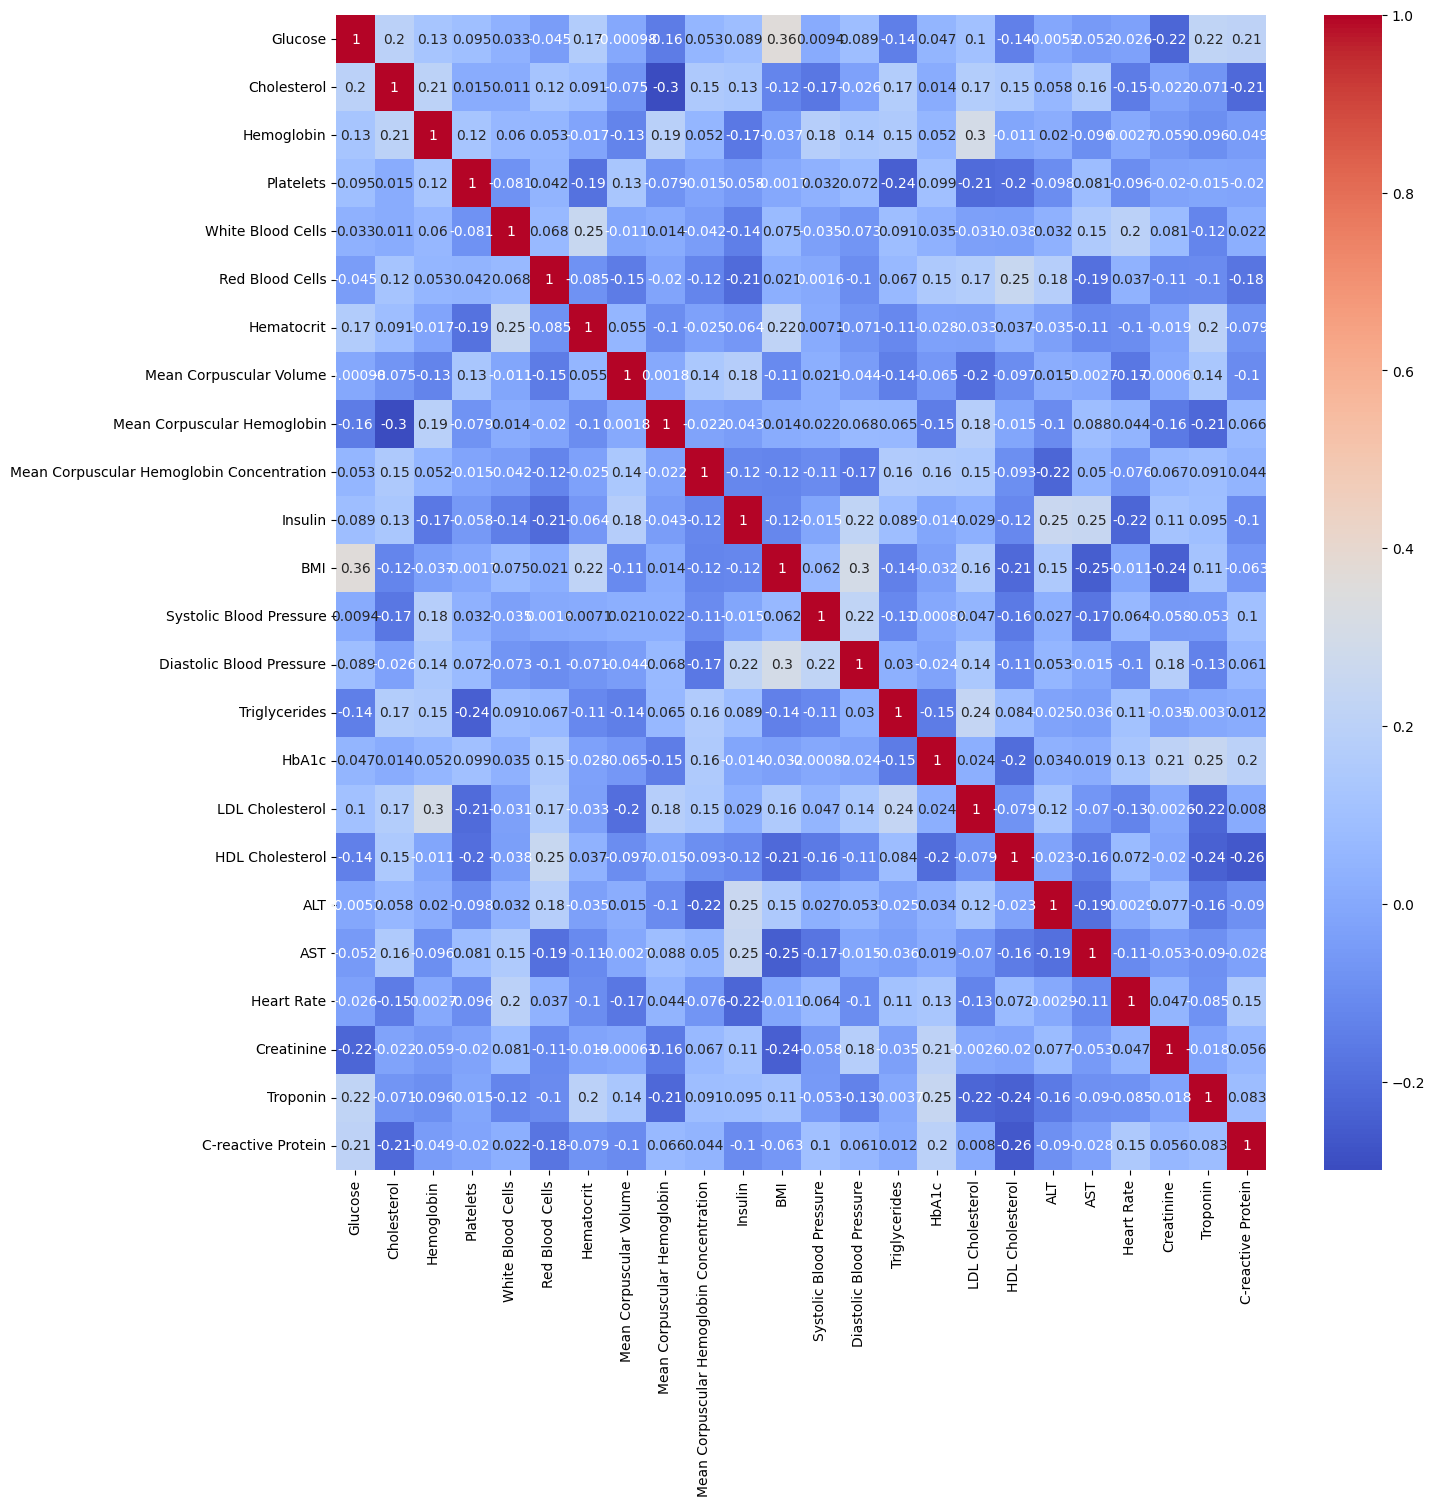

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()

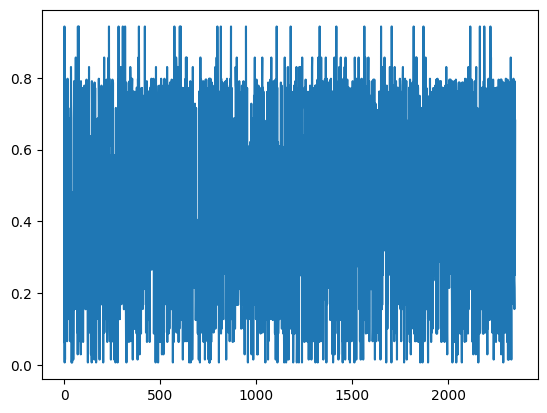

In [ ]:
plt.plot(X['ALT'])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([2, 1, 3, ..., 0, 1, 0])

In [ ]:
from sklearn.preprocessing import StandardScaler
def preprocess(abc):
    scaler = StandardScaler()
    abc = scaler.fit_transform(abc)
    return abc

In [ ]:
X = preprocess(X)
X

array([[ 1.49609131,  1.0716452 ,  0.46950094, ..., -1.43757398,
         0.0452339 ,  1.39484474],
       [-0.95713817, -1.54800325,  1.32148313, ...,  1.0206578 ,
         1.4429878 , -0.11993408],
       [ 0.35622976, -1.15921011, -0.15336582, ..., -0.0339361 ,
         1.37167968,  1.43590883],
       ...,
       [-0.07335025,  1.63021024, -0.01480305, ...,  0.7923432 ,
        -0.23673564, -1.21937524],
       [-0.04409842, -1.5846793 ,  1.1509923 , ...,  1.99385263,
        -0.17296934, -1.16902727],
       [-1.31078474, -1.4204426 , -1.78144884, ...,  0.05326127,
        -0.65955143,  1.14804551]])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression(multi_class = 'multinomial', solver='lbfgs')

lr.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [ ]:
y_pred = lr.predict(X_train)

In [ ]:
accuracy_score(y_pred,y_train)

1.0

In [ ]:
y_pred_1 = lr.predict(X_test)
accuracy_score(y_pred_1,y_test)

1.0

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred2 = knn.predict(X_train)
accuracy_score(y_pred2,y_train)

1.0

In [ ]:
y_pred2_1 = knn.predict(X_test)
accuracy_score(y_pred2_1,y_test)

1.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_train)
accuracy_score(y_pred3,y_train)

1.0

In [ ]:
y_pred3_1 = rf.predict(X_test)
accuracy_score(y_pred3_1, y_test)

1.0

In [ ]:
from re import S
data = [[56,45,78,99,67,56,78,98,67,56,68,56,87,5,76,46,78,67,78,57,56,87,90,67]]
scaler = StandardScaler()
data = scaler.fit_transform(data)
h=lr.predict(data)
le.inverse_transform(h)

array(['Thalasse'], dtype=object)

In [ ]:
import pickle
pickle.dump(lr,open('model.pkl','wb'))

In [ ]:
pickle.dump(le,open('label.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))